# Exercise - OLS violations

**(1)** Test for violations of the first OLS assumption: $E[u_t]=0$

**(2)** Apply the possible solutions to violtations of the first OLS assumtions:
> **(a)** Use constant coefficient in the linear regression

**(3)** Test for violations of the homoskedasticity assumption $E[u^2_t]=\sigma^2$:
> **(a)** Goldfeld-Quandt (1965) test

> **(b)** White (1980) test, which has two implementations
>> **(i)** Lagrange multiplier test

**(4)** Apply the possible solutions to heteroskedasticity:
> **(a)** Transform the variables into logs

> **(b)** Apply the White (1980) heteroskedasticity correction for the standard errors

**(5)** Test for violations of the third OLS assumption: $cov(u_t, u_{t-1})=0$

In [35]:
library(here)
library(readxl)
library(car)
library(lmtest)
library(dplyr)
library(plm)
library(Hmisc)

Warning message:
"package 'Hmisc' was built under R version 3.6.3"Loading required package: lattice
Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"Loading required package: Formula
Warning message:
"package 'Formula' was built under R version 3.6.3"Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units



In [10]:
df = read_excel(here('src', 'data', 'dados_portfolio.xlsx'))
head(df)

Data,PETR4,rcppet,ITAUSA,rcpitausa,IBOV,rcpibov,BM1,BM1p,BM2,...,Mom2,Mom2p,Mom3,Mom3p,ILLIQ1,ILLIQ1p,ILLIQ2,ILLIQ2p,ILLIQ3,ILLIQ3p
2001-01-02,2.822474,2.8213380,0.2695546,-1.5666102,15425,1.0820077,-0.008020660,-0.8020660,-0.009106201,...,0.050059196,5.0059196,0.002738827,0.2738827,-0.004059543,-0.4059543,0.056667209,5.6667209,0.010049764,1.0049764
2001-01-03,2.975915,5.2937754,0.2879978,6.6181905,16599,7.3352883,0.071019791,7.1019791,0.062202081,...,0.069391854,6.9391854,0.068765141,6.8765141,0.083359264,8.3359264,0.066459663,6.6459663,0.087869622,8.7869622
2001-01-04,2.996894,0.7024584,0.2851603,-0.9901062,16675,0.4568139,0.000996872,0.0996872,0.007382796,...,-0.007310275,-0.7310275,-0.000676961,-0.0676961,0.004370704,0.4370704,-0.007697583,-0.7697583,-0.004855833,-0.4855833
2001-01-05,2.968723,-0.9444483,0.2794855,-2.0101160,16409,-1.6080627,-0.008905386,-0.8905386,-0.006155613,...,-0.011557406,-1.1557406,-0.003794188,-0.3794188,-0.018392449,-1.8392449,-0.012300227,-1.2300227,0.006731826,0.6731826
2001-01-08,2.960331,-0.2830560,0.2823229,1.0101086,16562,0.9280950,0.006842936,0.6842936,0.009757482,...,0.006140224,0.6140224,0.002387666,0.2387666,0.007300743,0.7300743,0.002003660,0.2003660,0.006125503,0.6125503
2001-01-09,3.022667,2.0838280,0.2837416,0.5012537,16975,2.4630759,0.022935860,2.2935860,0.028703423,...,0.013163301,1.3163301,0.031327028,3.1327028,0.024950778,2.4950778,0.019179260,1.9179260,0.020972461,2.0972461


In [11]:
dim(df)

[1] 4868   31

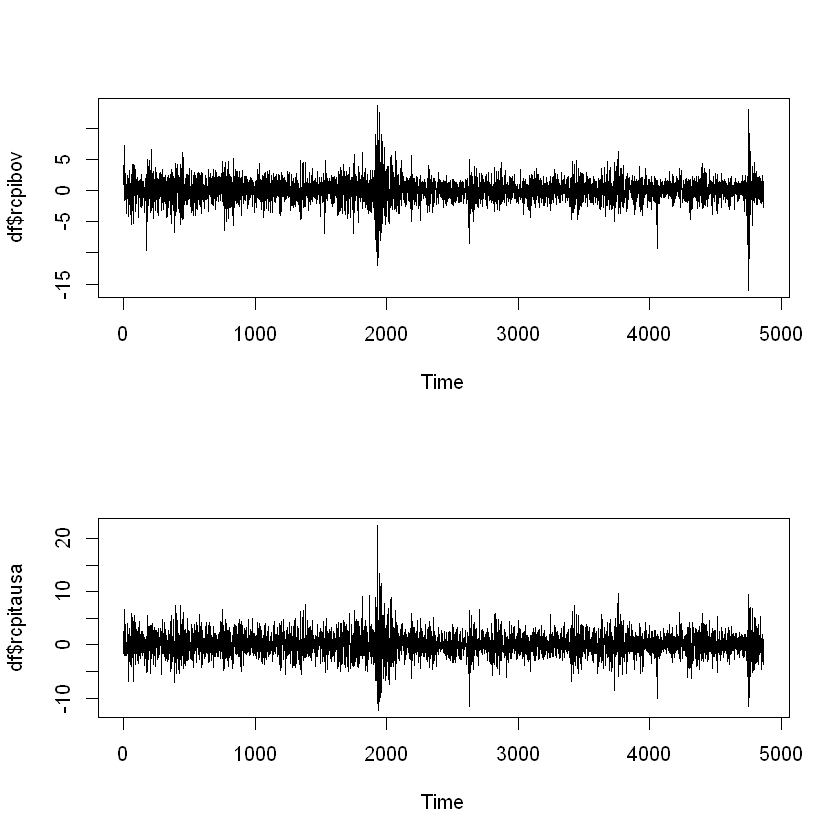

In [12]:
par(mfrow=c(2, 1))
ts.plot(df$rcpibov)
ts.plot(df$rcpitausa)

**(1)** Test for violations of the first OLS assumption: $E[u_t]=0$

To test for violations of the first OLS assumtion, we estimate the linear model without including an intercept.

### Model 1: rcpitausa ~ rcpibov

In [13]:
model1 = lm(rcpitausa ~ rcpibov -1, df)
summary(model1)


Call:
lm(formula = rcpitausa ~ rcpibov - 1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7269 -0.7791 -0.0041  0.8068 10.8712 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
rcpibov  0.95016    0.01091   87.12   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.377 on 4867 degrees of freedom
Multiple R-squared:  0.6093,	Adjusted R-squared:  0.6092 
F-statistic:  7590 on 1 and 4867 DF,  p-value: < 2.2e-16


### Model 2: rcpitausa ~ rcpibov + BM1p + Size1p + Mom1p + ILLIQ1p

In [14]:
model2 = lm(rcpitausa ~ rcpibov + BM1p + Size1p + Mom1p + ILLIQ1p -1, df)
summary(model2)


Call:
lm(formula = rcpitausa ~ rcpibov + BM1p + Size1p + Mom1p + ILLIQ1p - 
    1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0455 -0.7774 -0.0029  0.7925 10.2846 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
rcpibov  0.75745    0.04659  16.258  < 2e-16 ***
BM1p    -0.08378    0.03840  -2.182   0.0292 *  
Size1p  -0.06716    0.03350  -2.005   0.0450 *  
Mom1p   -0.14398    0.03454  -4.169 3.12e-05 ***
ILLIQ1p  0.46407    0.05208   8.911  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.357 on 4863 degrees of freedom
Multiple R-squared:  0.6208,	Adjusted R-squared:  0.6204 
F-statistic:  1592 on 5 and 4863 DF,  p-value: < 2.2e-16


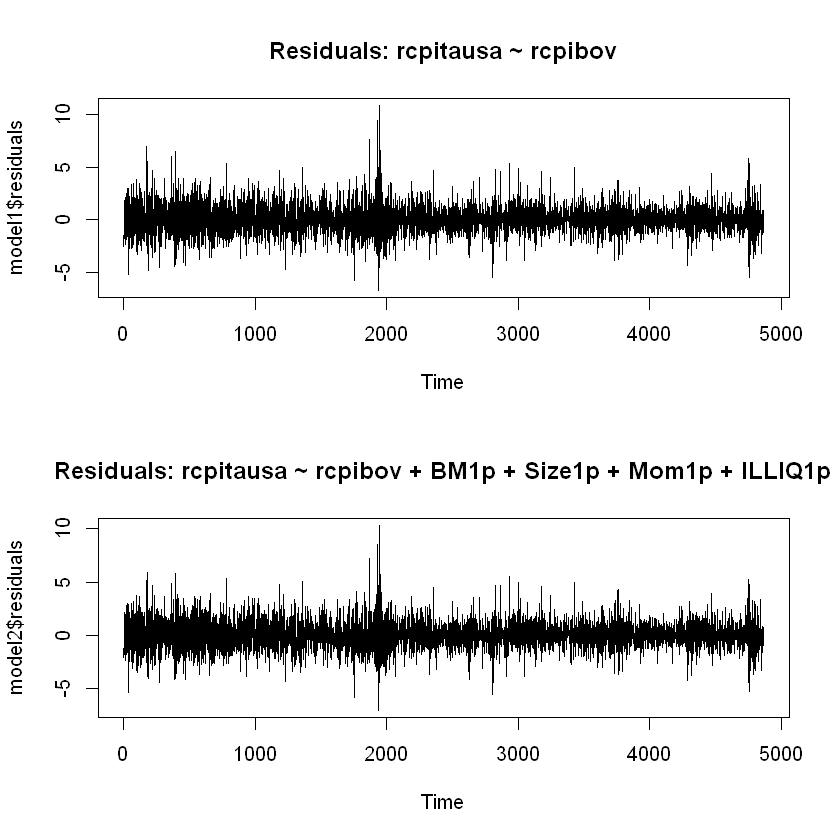

In [15]:
par(mfrow=c(2,1))
ts.plot(model1$residuals)
title('Residuals: rcpitausa ~ rcpibov')
ts.plot(model2$residuals)
title('Residuals: rcpitausa ~ rcpibov + BM1p + Size1p + Mom1p + ILLIQ1p')

In [16]:
print(paste0('Mean of the residuals of the first model: ', mean(model1$residuals), 'Mean of the residuals of the second model: ', mean(model2$residuals)))

[1] "Mean of the residuals of the first model: 0.0360889834331515Mean of the residuals of the second model: 0.0316658406273357"


The analysis of the residuals of the first and second model (ts plot and mean) appears to indicate that the first hypothesis is not violated.

Since we do not have any good reason to exclude the intercept, we choose to include it.

**(2)** Apply the possible solutions to violtations of the first OLS assumtions:
> **(a)** Use constant coefficient in the linear regression

### Model 1: rcpitausa ~ rcpibov + const

In [17]:
model1 = lm(rcpitausa ~ rcpibov, df)
summary(model1)


Call:
lm(formula = rcpitausa ~ rcpibov, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7645 -0.8155 -0.0401  0.7709 10.8362 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.03611    0.01974   1.829   0.0675 .  
rcpibov      0.94973    0.01091  87.082   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.377 on 4866 degrees of freedom
Multiple R-squared:  0.6091,	Adjusted R-squared:  0.6091 
F-statistic:  7583 on 1 and 4866 DF,  p-value: < 2.2e-16


### Model 2: rcpitausa ~ rcpibov + BM1p + Size1p + Mom1p + ILLIQ1p + const

In [18]:
model2 = lm(rcpitausa ~ rcpibov + BM1p + Size1p + Mom1p + ILLIQ1p, df)
summary(model2)


Call:
lm(formula = rcpitausa ~ rcpibov + BM1p + Size1p + Mom1p + ILLIQ1p, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0758 -0.8086 -0.0347  0.7587 10.2569 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.03185    0.01951   1.632   0.1026    
rcpibov      0.76062    0.04662  16.315  < 2e-16 ***
BM1p        -0.08451    0.03839  -2.201   0.0278 *  
Size1p      -0.06956    0.03352  -2.075   0.0380 *  
Mom1p       -0.14161    0.03456  -4.097 4.25e-05 ***
ILLIQ1p      0.46067    0.05211   8.840  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.357 on 4862 degrees of freedom
Multiple R-squared:  0.6206,	Adjusted R-squared:  0.6202 
F-statistic:  1591 on 5 and 4862 DF,  p-value: < 2.2e-16


**(3)** Test for violations of the homoskedasticity assumption $E[u^2_t]=\sigma^2$:
> **(a)** Goldfeld-Quandt (1965) test

Assume that we have a sample o f size T, which in our case is T=4868. The Goldfeld-Quandt test consists in splitting the sample into two parts, T1 and T2. The linear regression model is estimated in each of the samples, and the residual variances are calulated. 

The hypothesis of the test is as follows:

$
H_0: \sigma^2_1 = \sigma^2_2 \\
H_1: \sigma^2_1 \neq \sigma^2_2
$

The test statistics, denoted GQ, is given by:

$
GQ = \frac{max(s^2_1, s^2_2)}{min(s^2_1, s^2_2)} \sim F(T_1-k, T_2-k)
$

Where:

$
s^2_1 = \frac{\hat{u}^{'}_1\hat{u}_1}{T_1-k} \quad s^2_2 = \frac{\hat{u}^{'}_2\hat{u}_2}{T_2-k} 
$


### Model 1: rcpitausa ~ rcpibov + const

In [19]:
gqtest(df$rcpitausa ~ df$rcpibov, alternative = 'two.sided')


	Goldfeld-Quandt test

data:  df$rcpitausa ~ df$rcpibov
GQ = 0.50878, df1 = 2432, df2 = 2432, p-value < 2.2e-16
alternative hypothesis: variance changes from segment 1 to 2


### Model 2: rcpitausa ~ rcpibov + BM1p + Size1p + Mom1p + ILLIQ1p + const

In [20]:
gqtest(df$rcpitausa ~ df$rcpibov + df$BM1p + df$Size1p + df$Mom1p + df$ILLIQ1p, alternative = 'two.sided')


	Goldfeld-Quandt test

data:  df$rcpitausa ~ df$rcpibov + df$BM1p + df$Size1p + df$Mom1p +     df$ILLIQ1p
GQ = 0.53597, df1 = 2428, df2 = 2428, p-value < 2.2e-16
alternative hypothesis: variance changes from segment 1 to 2


For both of the models the p-value is smaller then the threshold of 0.05. Therefore, we can strongly reject the null hypothesis of homoskedasticity.

> **(b)** White (1980) test, which has two implementations

The white test consists of a two-step procedure. First estimate a linear regression model (assuming two independent variables):

$
y_t = \beta_1 + \beta_2 x_{2,t} + \beta_3 x_{3,t} + u_t
$

Second, run the auxiliary regression model given by:

$
\hat{u}^2_t = \alpha_1 + \alpha_2 x_{2,t} + \alpha_3 x_{3,t} + \alpha_4 x^2_{2,t} + \alpha_5 x^2_{3,t} + \alpha_6 x_{2,t}x_{3,t} + v_t
$

Given the auxiliary regression, the test can be conducted using two different approaches:

> **(i)** Lagrange multiplier test

The Lagrange multiplier test is an easy implementation of the White test which consists of the following hypothesis:

$
H_0: \sigma^2_t = \sigma^2 \\
H_1: \sigma^2_t = \mathcal{f}(\mathbf{x}, \mathbf{z}; \delta) 
$

where $\mathbf{x}$ is a vector of independent variables, $\mathbf{z}$ is a vector of the interations between independent variables, and $\delta$ is a vector of coefficients including the interation coefficients.

The test statistics, denoted W, is given by:

$
W = T*R^2 \sim \chi^2(m)
$

where T is the sample size, and $R^2$ is the coefficient of determination. The statistics $W$ follows a qui-squared distribution with $m$ degress f freedom, where $m$ is the number of regressors in the auxiliary model.

### Auxiliary model 1

In [21]:
df_white1 = data.frame(cbind(model1$residuals^2, df$rcpibov, df$rcpibov^2))
colnames(df_white1) = c('resid', 'rcpibov', 'rcpibov_2')
white_model_1 = lm(resid ~ rcpibov + rcpibov_2 , data = df_white1) 
summary(white_model_1)


Call:
lm(formula = resid ~ rcpibov + rcpibov_2, data = df_white1)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.434  -1.507  -1.101   0.243 114.861 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.524132   0.061167  24.917  < 2e-16 ***
rcpibov     0.099219   0.032231   3.078  0.00209 ** 
rcpibov_2   0.112192   0.005924  18.939  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.043 on 4865 degrees of freedom
Multiple R-squared:  0.06881,	Adjusted R-squared:  0.06843 
F-statistic: 179.8 on 2 and 4865 DF,  p-value: < 2.2e-16


Since both the independent variables of the auxiliary model 1 are significant, we have evidence to reject the null hypothesis of homoskedasticity.

### Auxiliary model 2

In [22]:
df_white2 = data.frame(cbind(model2$residuals^2, df$rcpibov, df$rcpibov^2,
                            df$BM1p, df$BM1p^2,
                            df$Size1p, df$Size1p^2,
                            df$Mom1p, df$Mom1p^2,
                            df$ILLIQ1p, df$ILLIQ1p^2,
                            df$BM1p * df$Size1p, df$BM1p * df$Mom1p, 
                            df$BM1p * df$ILLIQ1p, df$Size1p * df$Mom1p,
                            df$Size1p * df$ILLIQ1p, df$Mom1p * df$ILLIQ1p))
colnames(df_white2) = c('resid', 'rcpibov', 'rcpibov_2', 'BM1p', 'BM1p_2',
                        'Size1p', 'Size1p_2', 'Mom1p', 'Mom1p_2', 'ILLIQ1p', 'ILLIQ1p_2',
                        'BM1p_Size1p', 'BM1p_Mom1p', 'BM1p_ILLIQ1p', 'Size1p_Mom1p',
                        'Size1p_ILLIQ1p', 'Mom1p_ILLIQ1p')
white_model_2 = lm(resid ~ rcpibov + rcpibov_2 + BM1p + BM1p_2 + 
                   Size1p + Size1p_2 + Mom1p + Mom1p_2 + ILLIQ1p + ILLIQ1p_2 + 
                   BM1p_Size1p + BM1p_Mom1p + BM1p_ILLIQ1p + Size1p_Mom1p + 
                   Size1p_ILLIQ1p + Mom1p_ILLIQ1p, data = df_white2) 
summary(white_model_2)


Call:
lm(formula = resid ~ rcpibov + rcpibov_2 + BM1p + BM1p_2 + Size1p + 
    Size1p_2 + Mom1p + Mom1p_2 + ILLIQ1p + ILLIQ1p_2 + BM1p_Size1p + 
    BM1p_Mom1p + BM1p_ILLIQ1p + Size1p_Mom1p + Size1p_ILLIQ1p + 
    Mom1p_ILLIQ1p, data = df_white2)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.475  -1.400  -0.950   0.244 101.499 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.22530    0.06478  18.914  < 2e-16 ***
rcpibov        -0.06357    0.12869  -0.494 0.621360    
rcpibov_2       0.06067    0.02198   2.761 0.005788 ** 
BM1p            0.26153    0.10656   2.454 0.014148 *  
BM1p_2          0.41120    0.11385   3.612 0.000307 ***
Size1p         -0.11856    0.09273  -1.279 0.201108    
Size1p_2        0.40194    0.07678   5.235 1.72e-07 ***
Mom1p          -0.19736    0.09546  -2.068 0.038740 *  
Mom1p_2         0.37504    0.08120   4.619 3.96e-06 ***
ILLIQ1p         0.24644    0.14589   1.689 0.091233 .  
ILLIQ1p_2       0.30382    

Since most fo the independent variables of the auxiliary model 2 are significant, we have evidence to reject the null hypothesis of homoskedasticity.

**(4)** Apply the possible solutions to heteroskedasticity:
> **(a)** Transform the variables into logs

If the cause of the heteroskedasticity is known (i.e. induced by a constant in the variance of the error), the easiest way to fix it is to make a trnsformation of the original linear model (i.e. dividing or multiplying by a constant, and/or taking the log).

Since in our case we do not know the source of heteroskedasticity, error correction procedures as the below are recomended.

> **(b)** Apply the White (1980) heteroskedasticity correction for the standard errors

[coeftest](https://www.rdocumentation.org/packages/lmtest/versions/0.9-38/topics/coeftest)

[vcovH](https://www.rdocumentation.org/packages/plm/versions/1.6-5/topics/vcovHC)

### SE corrected model 1 

In [55]:
coeftest(model1, vcov =  vcovHC(model1, type = "HC0"))


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.036105   0.019733  1.8297  0.06736 .  
rcpibov     0.949731   0.017977 52.8291  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


The White standard error correction does not affect our conclusion about the significance of the "rcpibov" independent variable.

### SE corrected model 2

In [56]:
coeftest(model2, vcov =  vcovHC(model2, type = "HC0"))


t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  0.031848   0.019518  1.6317  0.102798    
rcpibov      0.760624   0.061579 12.3520 < 2.2e-16 ***
BM1p        -0.084512   0.050634 -1.6691  0.095166 .  
Size1p      -0.069563   0.044040 -1.5795  0.114278    
Mom1p       -0.141610   0.044972 -3.1489  0.001649 ** 
ILLIQ1p      0.460671   0.075721  6.0838 1.264e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


The White correction for the model 2 specification changes significantly when compared with the model with no correction. Both the variables "BM1p" and "Size1p" that were significant before now became not significnat any more.

**(5)** Test for violations of the third OLS assumption: $cov(u_t, u_{t-1})=0$

One easy and effective way to test for violations of this hypothesis is to analyse the scatter plot of the fitted residuals against its lagged value, and the time series plot of the fitted residuals.

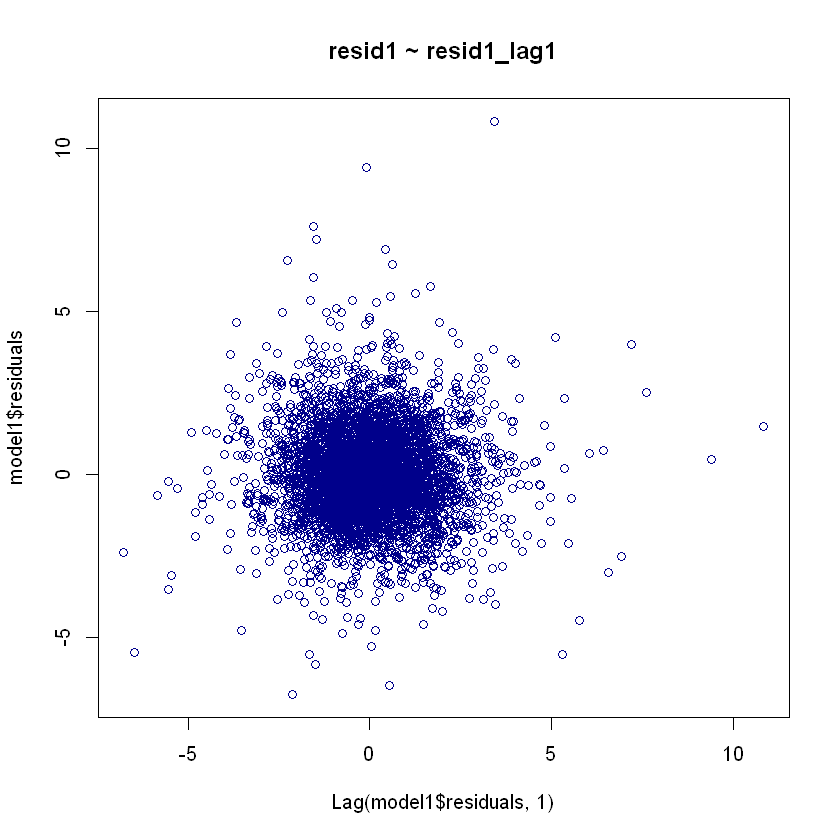

In [39]:
plot.default(Lag(model1$residuals, 1), model1$residuals, col='darkblue')
title('resid1 ~ resid1_lag1')

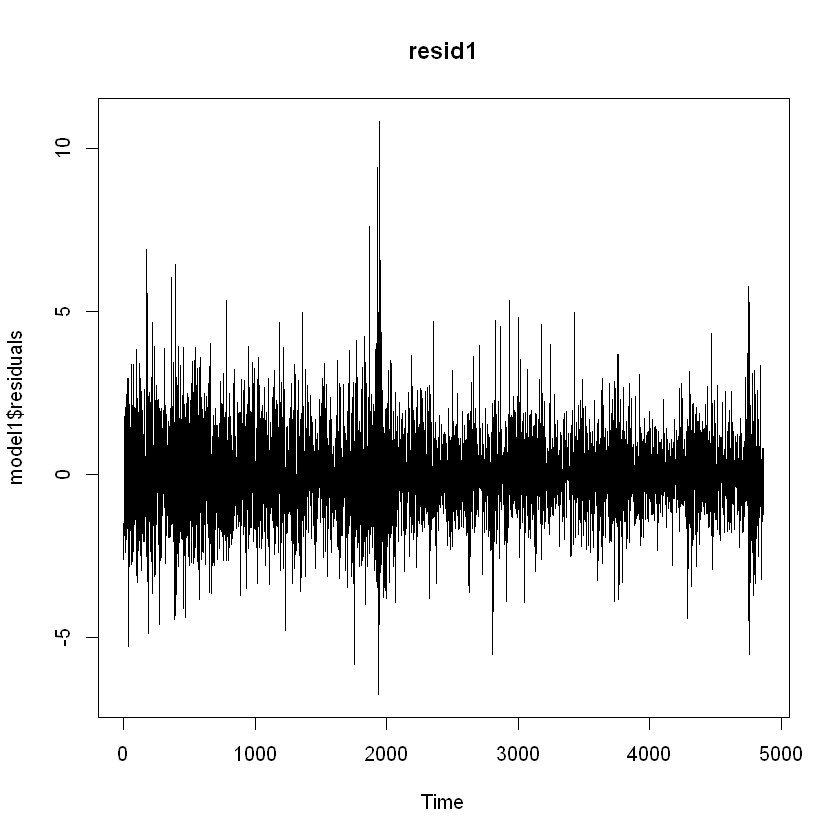

In [40]:
ts.plot(model1$residuals)
title('resid1')

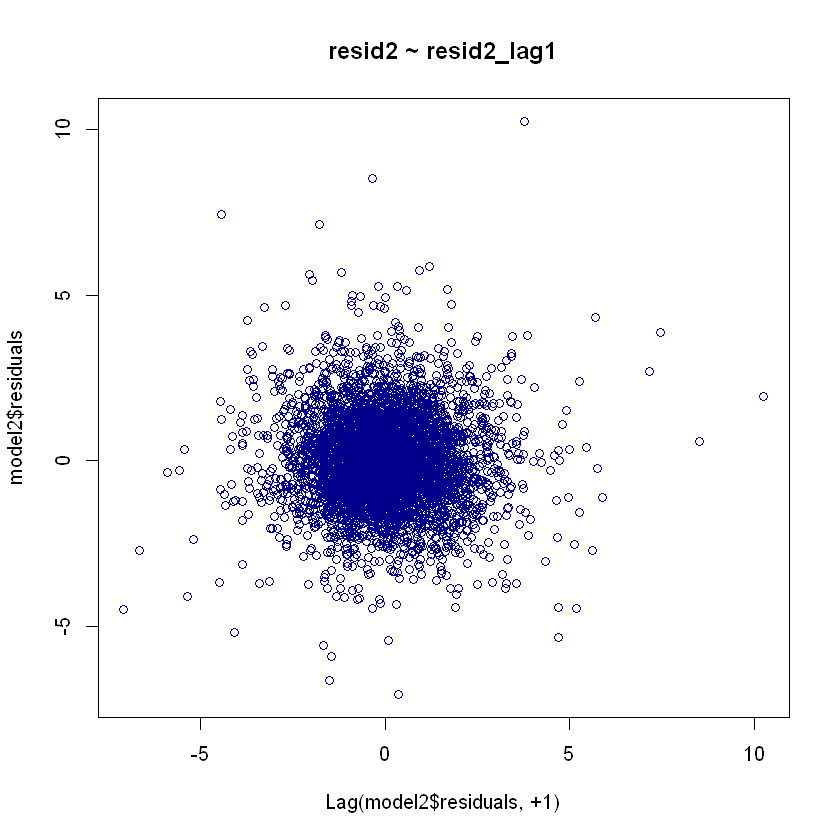

In [41]:
plot.default(Lag(model2$residuals, +1), model2$residuals, col='darkblue')
title('resid2 ~ resid2_lag1')

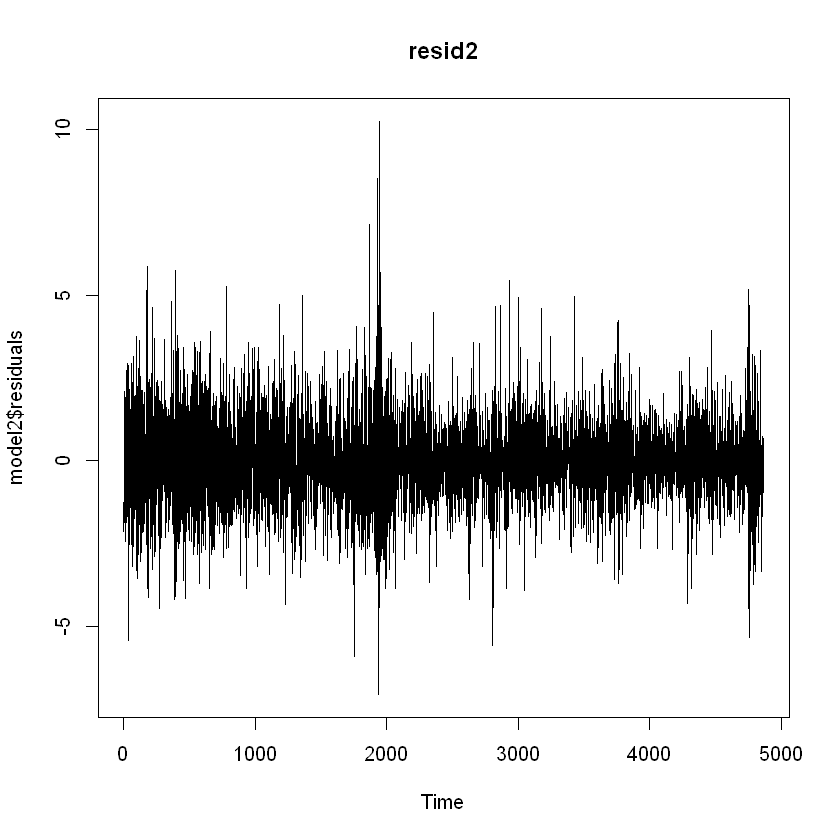

In [42]:
ts.plot(model2$residuals)
title('resid2')

Both the scatter plot and ts plot for both of the models do not indicate any sign of relationship of the errors throught time. This is an evidence of the abcense of violation of the third hypothesis.